# API testing notebook

In [3]:
import requests
import base64
from io import BytesIO
from PIL import Image
import uuid

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

URL_API = "https://toa4nqj3umza2o-5000.proxy.runpod.net/"

In [4]:
# basic route
print(requests.get(URL_API).text)


    <h1> Food dysmorphia API running </h1>

    Routes:
    <ul>
        <li> /position/pick </li>
        <li> /position/free </li>
        <li> /cards </li>
        <li> /media/<id> </li>
        <li> /transform </li>
        <li> /info </li>
    </ul>
    


In [19]:
# info route

url = URL_API + "info"
image_path = "image/coconut.jpg"
encoded_image = encode_image_to_base64(image_path)
payload = {"image": encoded_image}

response = requests.post(url, json=payload)

print(response.text)

<!doctype html>
<html lang=en>
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



person with a coconut face


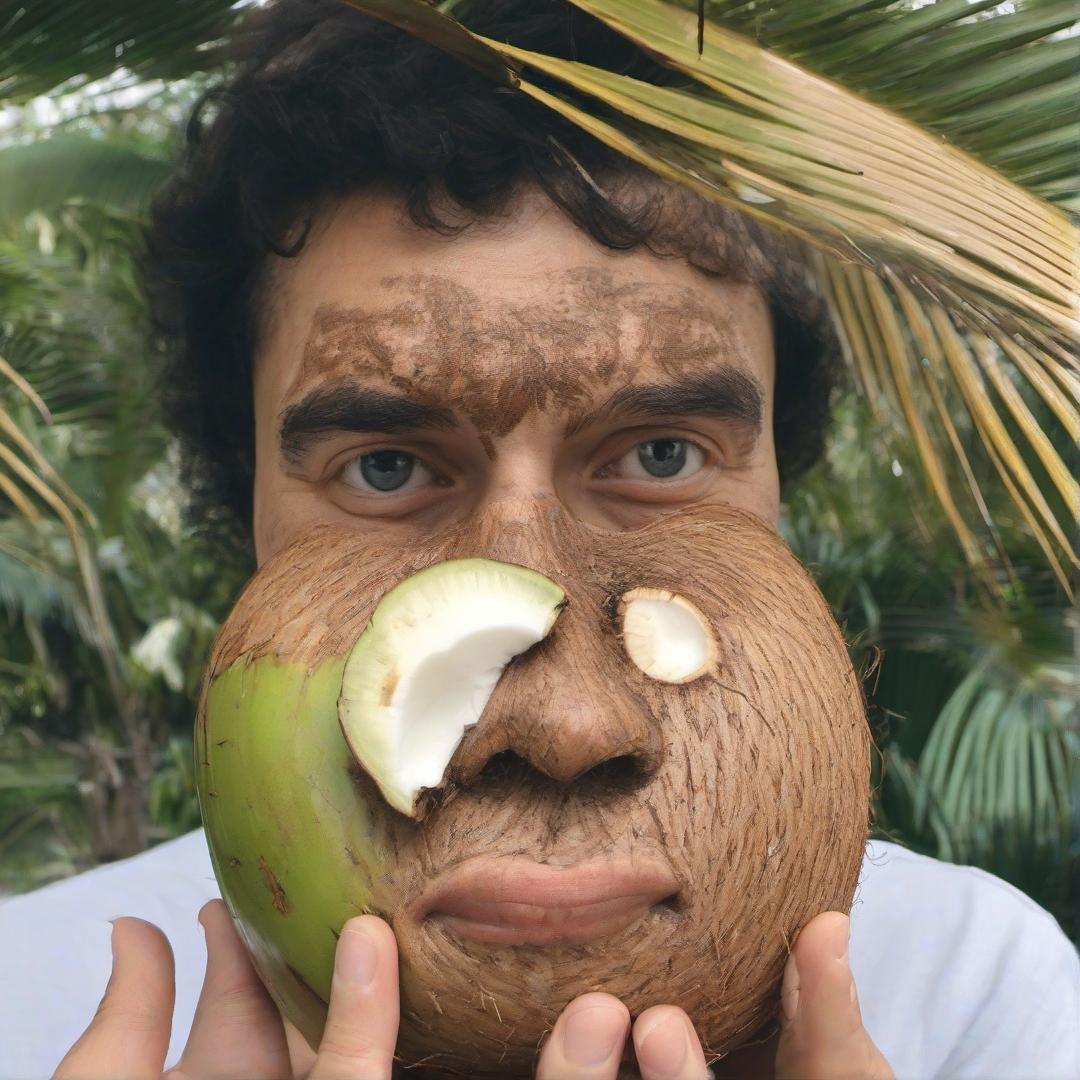

In [20]:
# next position

url = URL_API + "transform"

payload = {
    "input_images": {
        "input_img.jpg": encoded_image
    },
    "workflow": "img2img",
    "client_id": str(uuid.uuid4()),
    "params": {
        "input_image": "input_img.jpg" 
    },
    "coords": [0.0, 0.0]
}

response = requests.post(url, json=payload)

card_info = response.json()

print(card_info["info_text"])

base64_str = card_info["image_b64"].split(',')[1]
Image.open(BytesIO(base64.b64decode(base64_str)))

In [18]:
encoded_image

'/9j/4AAQSkZJRgABAQEASABIAAD/4Qm2RXhpZgAATU0AKgAAAAgACwEPAAIAAAAGAAAAkgEQAAIAAAAbAAAAmAESAAMAAAABAAEAAAEaAAUAAAABAAAAtAEbAAUAAAABAAAAvAEoAAMAAAABAAIAAAExAAIAAAAFAAAAxAEyAAIAAAAUAAAAygE8AAIAAAAbAAAA3odpAAQAAAABAAAA+oglAAQAAAABAAAIeAAAAABBcHBsZQBpUGhvbmUgU0UgKDJuZCBnZW5lcmF0aW9uKQAAAAAASAAAAAEAAABIAAAAATE2LjcAADIwMjM6MTE6MDEgMTM6NTg6MzAAaVBob25lIFNFICgybmQgZ2VuZXJhdGlvbikAAAAkgpoABQAAAAEAAAKwgp0ABQAAAAEAAAK4iCIAAwAAAAEAAgAAiCcAAwAAAAEAfQAAkAAABwAAAAQwMjMykAMAAgAAABQAAALAkAQAAgAAABQAAALUkBAAAgAAAAcAAALokBEAAgAAAAcAAALwkBIAAgAAAAcAAAL4kQEABwAAAAQBAgMAkgEACgAAAAEAAAMAkgIABQAAAAEAAAMIkgMACgAAAAEAAAMQkgQACgAAAAEAAAMYkgcAAwAAAAEABQAAkgkAAwAAAAEAEAAAkgoABQAAAAEAAAMgkhQAAwAAAAQAAAMoknwABwAABOUAAAMwkpEAAgAAAAQxMDUAkpIAAgAAAAQxMDUAoAAABwAAAAQwMTAwoAIABAAAAAEAAAQ4oAMABAAAAAEAAAQ4ohcAAwAAAAEAAgAAowEABwAAAAEBAAAApAIAAwAAAAEAAAAApAMAAwAAAAEAAAAApAQABQAAAAEAAAgWpAUAAwAAAAEASwAApAYAAwAAAAEAAAAApDIABQAAAAQAAAgepDMAAgAAAAYAAAg+pDQAAgAAADQAAAhEpGAAAwAAAAEAAgAAAAAAAAAAAAEAAAAyAAAACQAAAAUyMDIzOjExOjAxIDEzOjU